In [1]:
using PolygonTriangulation, CairoMakie
include("../src/PolygonPlot.jl")
include("../src/EventPlot.jl")

eventFrame! (generic function with 8 methods)

In [45]:
function plotTriangulation(ax::Axis,tris::Array{Array{Vertex,1},1})
    for tri in tris
        a = Point2f0(tri[1].x,tri[1].y)
        b = Point2f0(tri[2].x,tri[2].y)
        c = Point2f0(tri[3].x,tri[3].y)

        poly!(ax,Point2f0[(a[1],a[2]),(b[1],b[2]),(c[1],c[2])])
    end
end

plotTriangulation (generic function with 1 method)

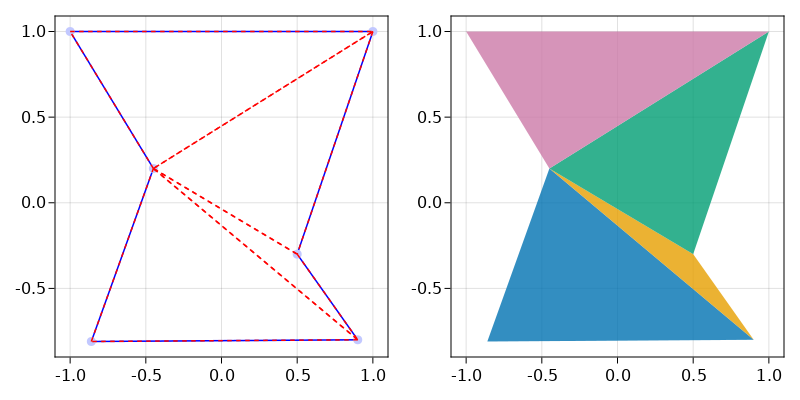

In [51]:
P = Polygon(
[
        Vertex(0.5,-0.3),
        Vertex(0.9,-0.8),
        Vertex(-0.86,-0.81),
        Vertex(-0.45,0.2),
        Vertex(-1.,1.),
        Vertex(1.,1.)
]
)

f = Figure(resolution=(800,400))
event = Vector{PolygonTriangulation.Event}([])
tris = triangulate(P,event)
polygonplot(f[1,1],P,tris)

ax = Axis(f[1,2])
plotTriangulation(ax,tris)
f

In [3]:
eventFrames(P,event)

"steps.gif"

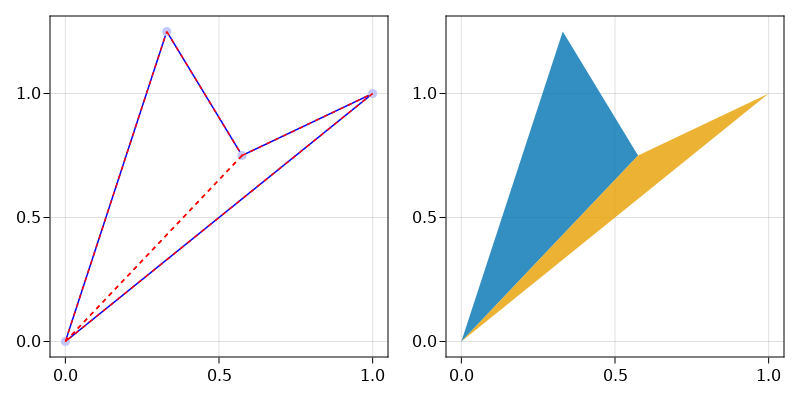

In [52]:
P = Polygon(
    [
        Vertex(0.0,0.0),
        Vertex(0.33,1.25),
        Vertex(0.575,0.75),
        Vertex(1.,1.)
    ]
)

f = Figure(resolution=(800,400))
event = Vector{PolygonTriangulation.Event}([])
tris = triangulate(P,event)
polygonplot(f[1,1],P,tris)

ax = Axis(f[1,2])
plotTriangulation(ax,tris)
f

In [9]:
eventFrames(P,event)

"steps.gif"

In [53]:
function generatePolygon(n::Int)
    theta = 0.
    dtheta = 2.0*π/n

    v = []
    for i in 1:n
        rad = rand()*1. + 1.0
        push!(v,rad*Vertex(cos(theta),sin(theta)))
        theta+=dtheta
    end
    return Polygon(v|>reverse)
end

generatePolygon (generic function with 1 method)

In [54]:
eventFrames(P,event)

"steps.gif"

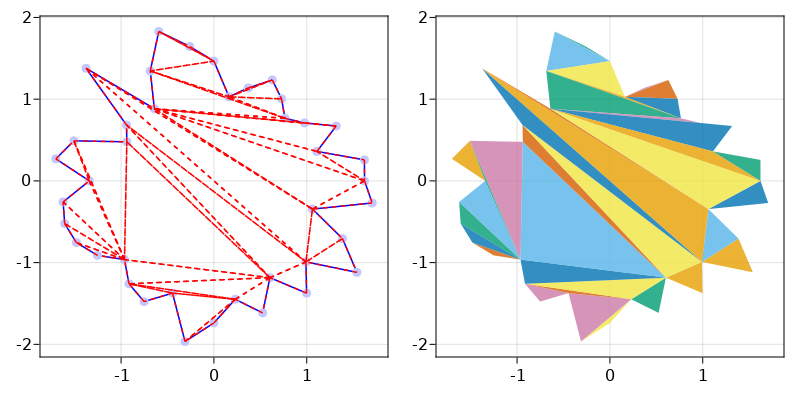

In [55]:
P = generatePolygon(40)

f = Figure(resolution=(800,400))
event = Vector{PolygonTriangulation.Event}([])
tris = triangulate(P,event)
polygonplot(f[1,1],P,tris)

ax = Axis(f[1,2])
plotTriangulation(ax,tris)
f

In [18]:
N = 8
R = 3

times = zeros(N-1,R)

for n in 2:N
    for r in 1:R
        
        nv = 2^n
        p = generatePolygon(nv)
        
        times[n-1,r] = (@timed triangulate(p))[2]
    end
end

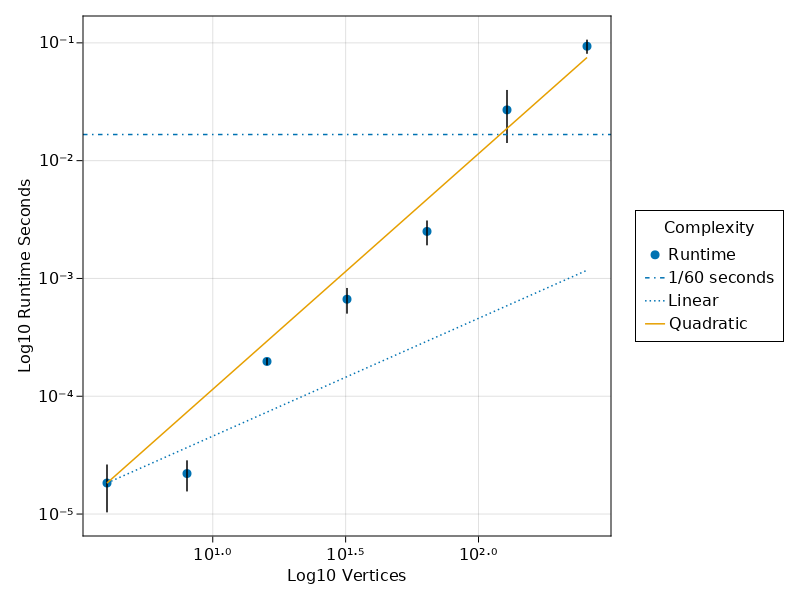

In [19]:
fig = Figure()
ax = Axis(fig[1,1],xscale=log10,yscale=log10,xlabel="Log10 Vertices",ylabel="Log10 Runtime Seconds")

using Statistics

μ = mean(times,dims=2)[:,1]
σ = std(times,dims=2)[:,1]
scatter!(ax,2 .^ collect(2:N),μ,label="Runtime")
errorbars!(ax,2 .^ collect(2:N),μ,σ./sqrt(R))
hlines!(ax,1.0/60.0,linestyle=:dashdot,label="1/60 seconds")
x = 2 .^ collect(2:N)
lines!(ax,x,(μ[1]/x[1]).*x,linestyle=:dot,label="Linear")
lines!(ax,x,(μ[1]/x[1]^2.).*x.^2.,label="Quadratic")
fig[1, 2] = Legend(fig, ax, "Complexity", framevisible = true)
save("complexity.png",fig)
fig